11501568/11490434 [==============================] - 0s 0us/step
Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


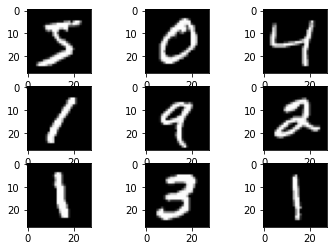

In [ ]:
# example of loading the mnist dataset
from keras.datasets import mnist
from matplotlib import pyplot
# load dataset
(trainX, trainy), (testX, testy) = mnist.load_data()
# summarize loaded dataset
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))
# plot first few images
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# plot raw pixel data
	pyplot.imshow(trainX[i], cmap=pyplot.get_cmap('gray'))
# show the figure
pyplot.show()

11501568/11490434 [==============================] - 0s 0us/step


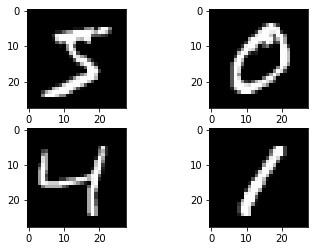

In [ ]:
# Plot ad hoc mnist instances
from keras.datasets import mnist
import matplotlib.pyplot as plt
# load (downloaded if needed) the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

In [ ]:
# define baseline model
def baseline_model():
	# create model
	model = Sequential()
	model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
	model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

In [ ]:
def baseline_model():
	# create model
	model = Sequential()
	model.add(Conv2D(32, (5, 5), input_shape=(1, 28, 28), activation='relu'))
	model.add(MaxPooling2D(pool_size=(2, 2)))
	model.add(Dropout(0.2))
	model.add(Flatten())
	model.add(Dense(128, activation='relu'))
	model.add(Dense(num_classes, activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

In [ ]:

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils

# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape((X_train.shape[0], num_pixels)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], num_pixels)).astype('float32')

# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [ ]:
# build the model
model = baseline_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Epoch 1/10
300/300 - 5s - loss: 0.2730 - accuracy: 0.9234 - val_loss: 0.1397 - val_accuracy: 0.9592
Epoch 2/10
300/300 - 4s - loss: 0.1098 - accuracy: 0.9679 - val_loss: 0.0990 - val_accuracy: 0.9690
Epoch 3/10
300/300 - 4s - loss: 0.0708 - accuracy: 0.9794 - val_loss: 0.0777 - val_accuracy: 0.9761
Epoch 4/10
300/300 - 4s - loss: 0.0486 - accuracy: 0.9861 - val_loss: 0.0704 - val_accuracy: 0.9779
Epoch 5/10
300/300 - 4s - loss: 0.0360 - accuracy: 0.9900 - val_loss: 0.0625 - val_accuracy: 0.9802
Epoch 6/10
300/300 - 4s - loss: 0.0263 - accuracy: 0.9930 - val_loss: 0.0630 - val_accuracy: 0.9815
Epoch 7/10
300/300 - 4s - loss: 0.0187 - accuracy: 0.9955 - val_loss: 0.0603 - val_accuracy: 0.9815
Epoch 8/10
300/300 - 4s - loss: 0.0137 - accuracy: 0.9969 - val_loss: 0.0592 - val_accuracy: 0.9823
Epoch 9/10
300/300 - 4s - loss: 0.0102 - accuracy: 0.9978 - val_loss: 0.0655 - val_accuracy: 0.9799
Epoch 10/10
300/300 - 4s - loss: 0.0076 - accuracy: 0.9987 - val_loss: 0.0628 - val_accuracy: 0.9814

In [ ]:
# Baseline MLP for MNIST dataset
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape((X_train.shape[0], num_pixels)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], num_pixels)).astype('float32')
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

# define baseline model
def baseline_model():
	# create model
	model = Sequential()
	model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
	model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model
# build the model
model = baseline_model()
model.summ
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Epoch 1/10
300/300 - 5s - loss: 0.2779 - accuracy: 0.9204 - val_loss: 0.1401 - val_accuracy: 0.9587
Epoch 2/10
300/300 - 4s - loss: 0.1105 - accuracy: 0.9686 - val_loss: 0.0913 - val_accuracy: 0.9720
Epoch 3/10
300/300 - 4s - loss: 0.0714 - accuracy: 0.9797 - val_loss: 0.0807 - val_accuracy: 0.9759
Epoch 4/10
300/300 - 4s - loss: 0.0499 - accuracy: 0.9855 - val_loss: 0.0686 - val_accuracy: 0.9792
Epoch 5/10
300/300 - 4s - loss: 0.0370 - accuracy: 0.9894 - val_loss: 0.0645 - val_accuracy: 0.9793
Epoch 6/10
300/300 - 4s - loss: 0.0270 - accuracy: 0.9928 - val_loss: 0.0636 - val_accuracy: 0.9802
Epoch 7/10
300/300 - 4s - loss: 0.0188 - accuracy: 0.9955 - val_loss: 0.0566 - val_accuracy: 0.9805
Epoch 8/10
300/300 - 4s - loss: 0.0147 - accuracy: 0.9968 - val_loss: 0.0657 - val_accuracy: 0.9799
Epoch 9/10
300/300 - 4s - loss: 0.0108 - accuracy: 0.9978 - val_loss: 0.0645 - val_accuracy: 0.9803
Epoch 10/10
300/300 - 4s - loss: 0.0079 - accuracy: 0.9986 - val_loss: 0.0635 - val_accuracy: 0.9815